# Name: Prasad Sanjay Khalkar

# Roll No: 33138

# TE-09 L-09

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree

### EDA

In [58]:
df = pd.read_csv("/home/prasadkhalkar/Desktop/ML/Datasets/Admission_Predict_Ver1.1.csv")
adm = df.copy()
adm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [59]:
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [60]:
adm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [61]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [62]:
adm.shape

(500, 9)

In [63]:
adm.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [64]:
adm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Data Visualisation

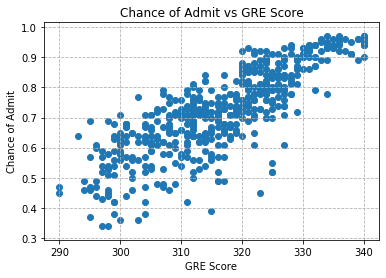

In [65]:
y = adm['Chance of Admit ']
x = adm['GRE Score']

plt.scatter(x,y)
plt.ylabel('Chance of Admit')
plt.xlabel('GRE Score')
plt.title('Chance of Admit vs GRE Score')
plt.grid(ls='--')
plt.show()

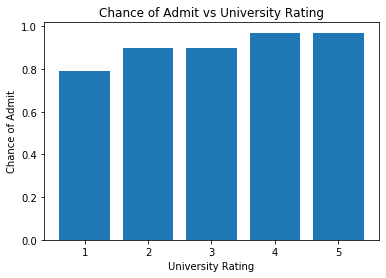

In [66]:
x = adm['University Rating']
plt.bar(x,y)
plt.ylabel('Chance of Admit')
plt.xlabel('University Rating')
plt.title('Chance of Admit vs University Rating')
plt.show()

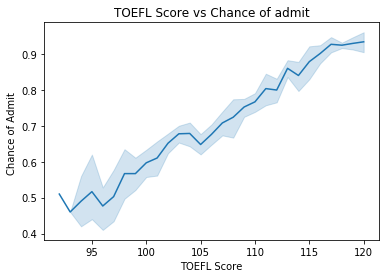

In [67]:
x = adm["TOEFL Score"]
y = adm["Chance of Admit "]
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title("TOEFL Score vs Chance of admit")
sns.lineplot(x,y)
plt.show()

### Label Encoding and Data Transformation

In [68]:
adm['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [69]:
adm.loc[adm['Chance of Admit ']>=0.8,'Chance of Admit '] = 1
adm.loc[adm['Chance of Admit ']<0.8,'Chance of Admit '] = 0

In [70]:
adm['Chance of Admit '].unique()

array([1., 0.])

In [71]:
adm['Chance of Admit '] = adm['Chance of Admit '].astype('int64')

In [72]:
adm

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


### Data Preparation using Decision Tree Classifier

In [73]:
y = adm['Chance of Admit ']
x = adm.drop(columns=['Serial No.','Chance of Admit '],axis=1)

In [74]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [75]:
y

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [77]:
y_test

361    1
73     1
374    0
155    0
104    0
      ..
220    0
176    1
320    0
153    0
231    0
Name: Chance of Admit , Length: 125, dtype: int64

In [78]:
model = DecisionTreeClassifier()

In [79]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
y_pred = model.predict(x_test)

In [81]:
final = pd.DataFrame(y_test)
final['Predicted'] = y_pred

In [82]:
final

,Chance of Admit,Predicted
361,1,1
73,1,0
374,0,0
155,0,0
104,0,1
...,...,...
220,0,0
176,1,1
320,0,0
153,0,0


### Without tree pruning

[Text(871.875, 1572.5571428571427, 'X[5] <= 8.845\ngini = 0.435\nsamples = 375\nvalue = [255, 120]'),
 Text(310.0, 1456.0714285714284, 'X[5] <= 8.63\ngini = 0.1\nsamples = 246\nvalue = [233, 13]'),
 Text(186.0, 1339.5857142857142, 'X[4] <= 1.75\ngini = 0.01\nsamples = 192\nvalue = [191, 1]'),
 Text(124.0, 1223.1, 'X[5] <= 8.33\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(62.0, 1106.6142857142856, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(186.0, 1106.6142857142856, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(248.0, 1223.1, 'gini = 0.0\nsamples = 183\nvalue = [183, 0]'),
 Text(434.0, 1339.5857142857142, 'X[1] <= 105.5\ngini = 0.346\nsamples = 54\nvalue = [42, 12]'),
 Text(372.0, 1223.1, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(496.0, 1223.1, 'X[6] <= 0.5\ngini = 0.457\nsamples = 34\nvalue = [22, 12]'),
 Text(434.0, 1106.6142857142856, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(558.0, 1106.6142857142856, 'X[3] <= 3.25\ngini = 0.5\nsamples = 24\nval

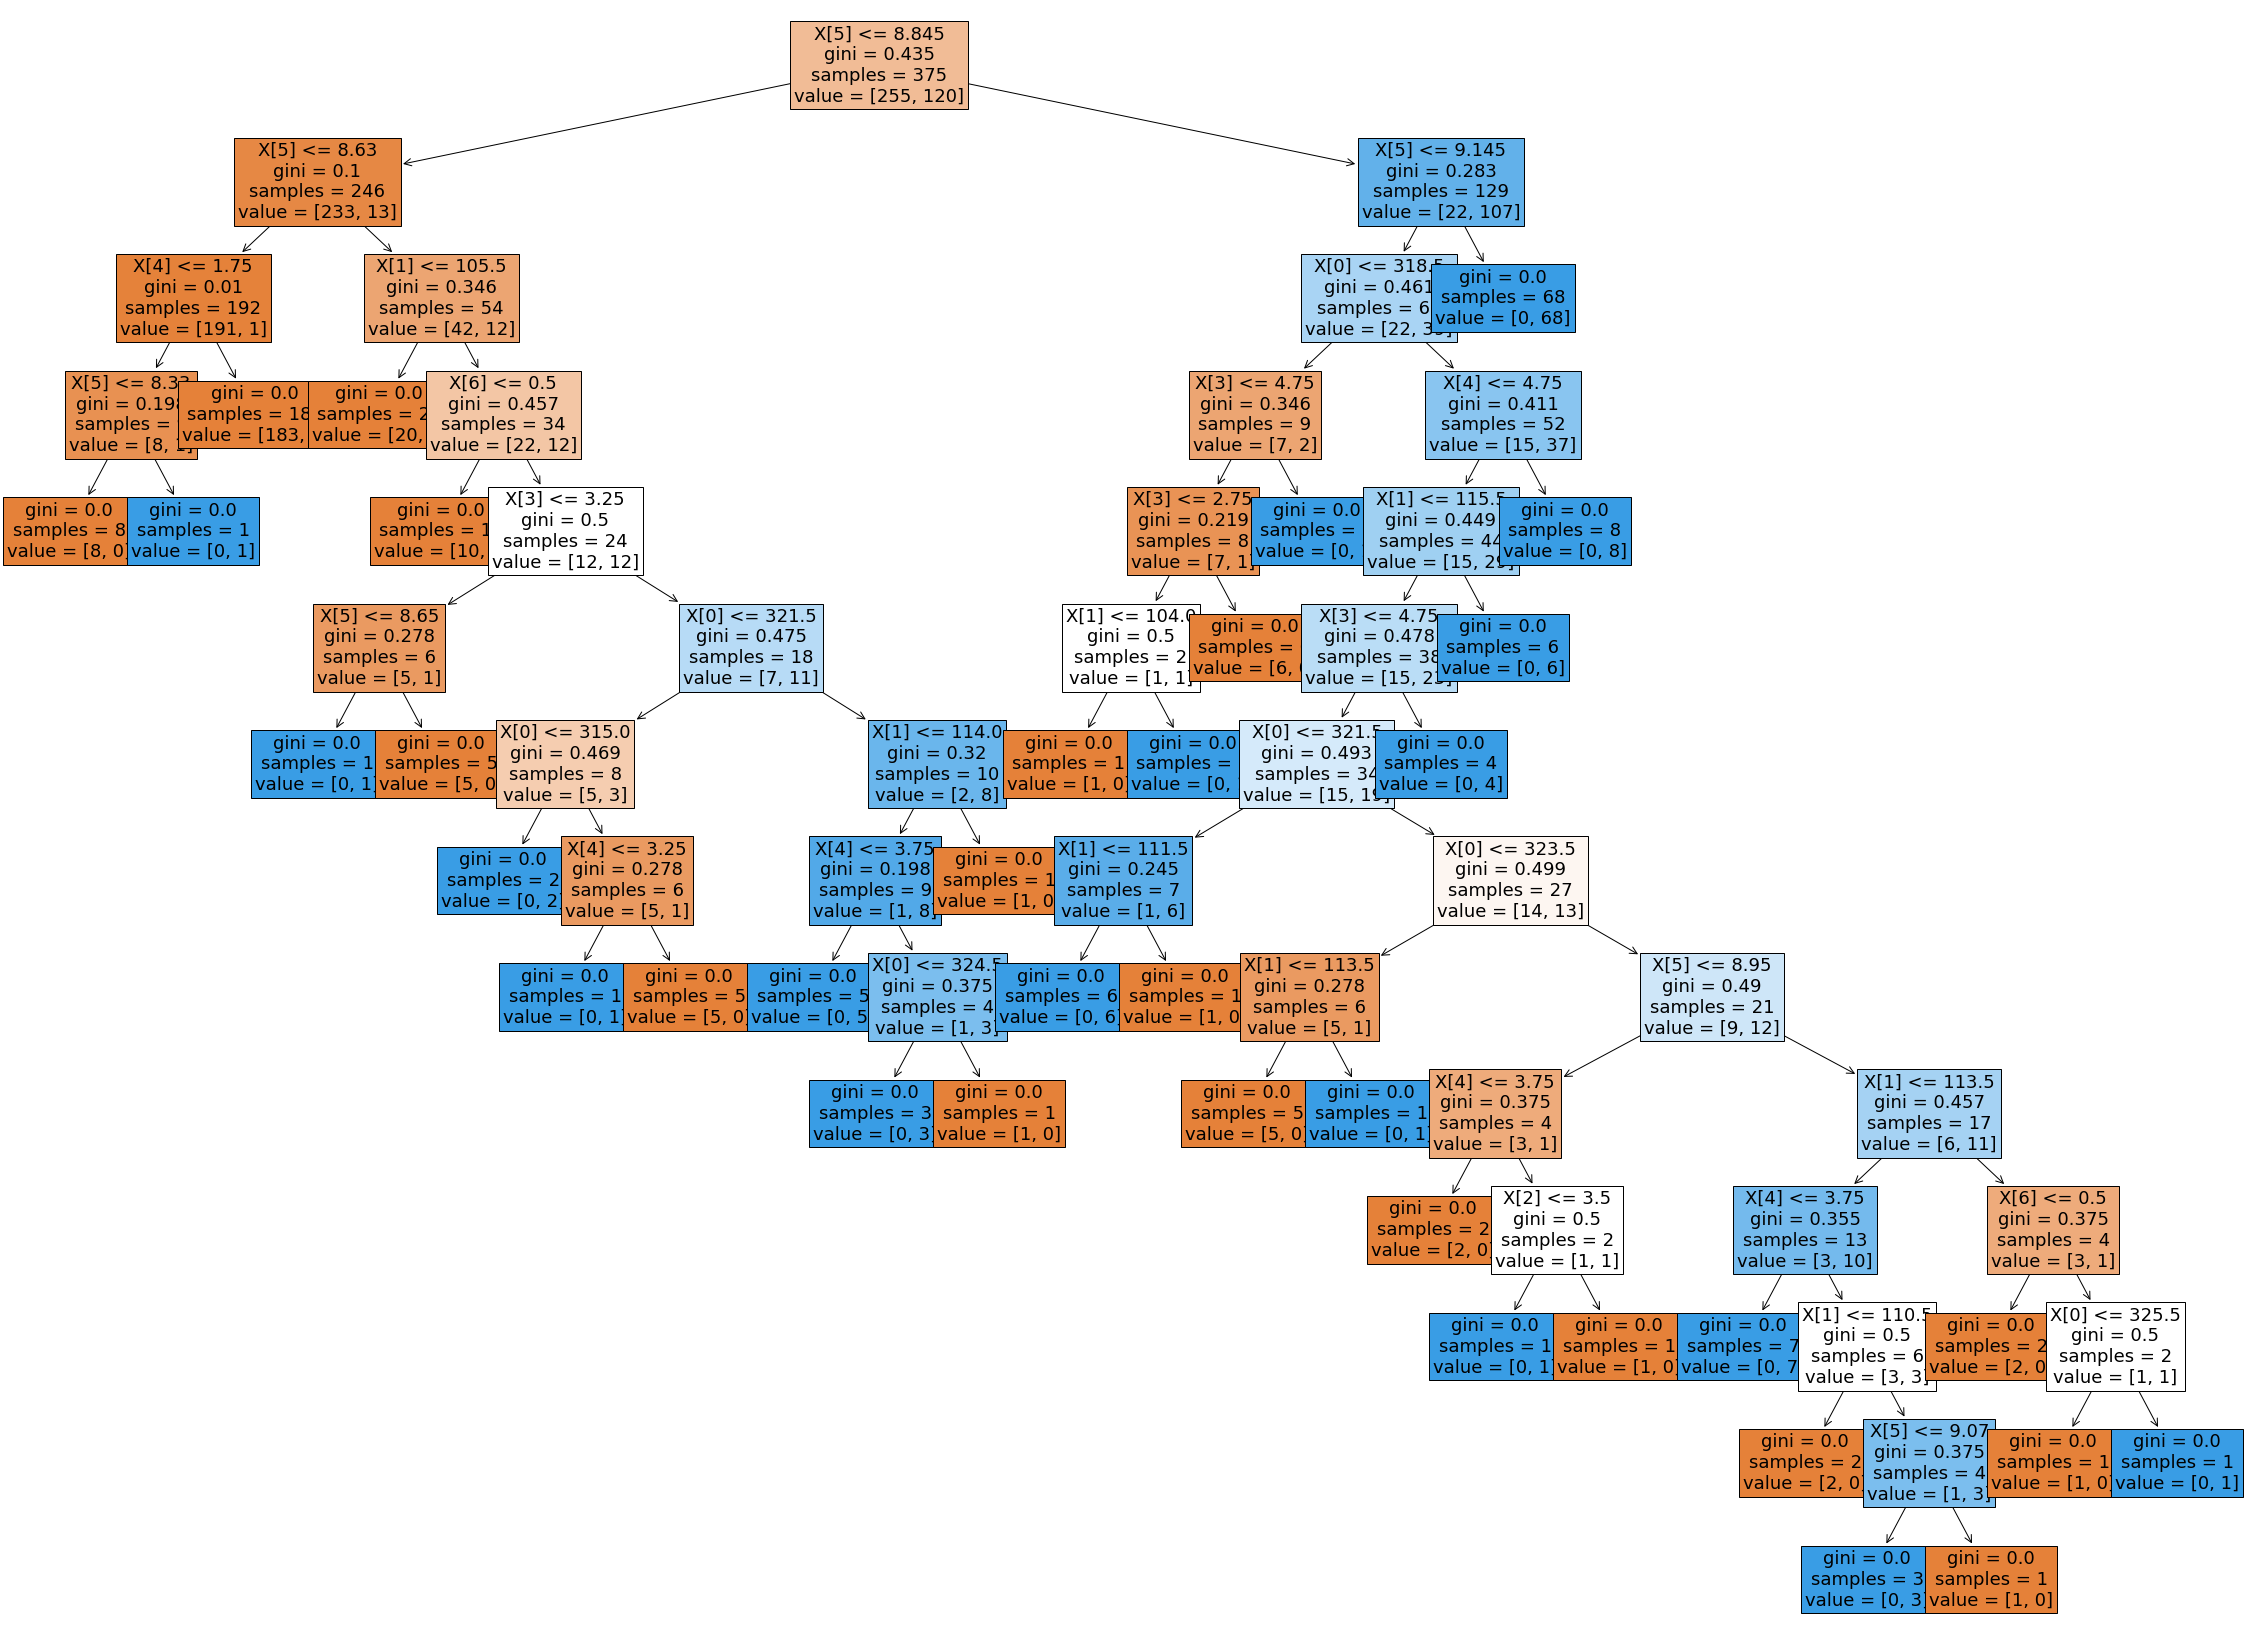

In [83]:
plt.figure(figsize=(40,30))
tree.plot_tree(model, filled=True, fontsize=18)

### Confusion Matrix

In [85]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[85,  5],
       [ 7, 28]])

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,precision_score,recall_score,r2_score,accuracy_score


In [87]:
print('Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('Mean Absolute Error: {:.2f}\n'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}\n'.format(mean_squared_error(y_test, y_pred)))
print('Precision: {:.2f}\n'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}\n'.format(recall_score(y_test, y_pred)))
print('R2 Score: {:.2f}\n'.format(r2_score(y_test, y_pred)))

Accuracy: 0.90

Mean Absolute Error: 0.10

Mean Squared Error: 0.10

Precision: 0.85

Recall: 0.80

R2 Score: 0.52



### With tree pruning

In [88]:
model = DecisionTreeClassifier(criterion='gini', min_samples_split=10 , max_leaf_nodes = 5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [89]:
final = pd.DataFrame(y_test)
final['Predicted'] = y_pred
final

,Chance of Admit,Predicted
361,1,1
73,1,0
374,0,0
155,0,0
104,0,1
...,...,...
220,0,0
176,1,1
320,0,0
153,0,0


[Text(1116.0, 1426.95, 'X[5] <= 8.845\ngini = 0.435\nsamples = 375\nvalue = [255, 120]'),
 Text(558.0, 1019.25, 'X[5] <= 8.63\ngini = 0.1\nsamples = 246\nvalue = [233, 13]'),
 Text(279.0, 611.55, 'gini = 0.01\nsamples = 192\nvalue = [191, 1]'),
 Text(837.0, 611.55, 'gini = 0.346\nsamples = 54\nvalue = [42, 12]'),
 Text(1674.0, 1019.25, 'X[5] <= 9.145\ngini = 0.283\nsamples = 129\nvalue = [22, 107]'),
 Text(1395.0, 611.55, 'X[0] <= 318.5\ngini = 0.461\nsamples = 61\nvalue = [22, 39]'),
 Text(1116.0, 203.8499999999999, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(1674.0, 203.8499999999999, 'gini = 0.411\nsamples = 52\nvalue = [15, 37]'),
 Text(1953.0, 611.55, 'gini = 0.0\nsamples = 68\nvalue = [0, 68]')]

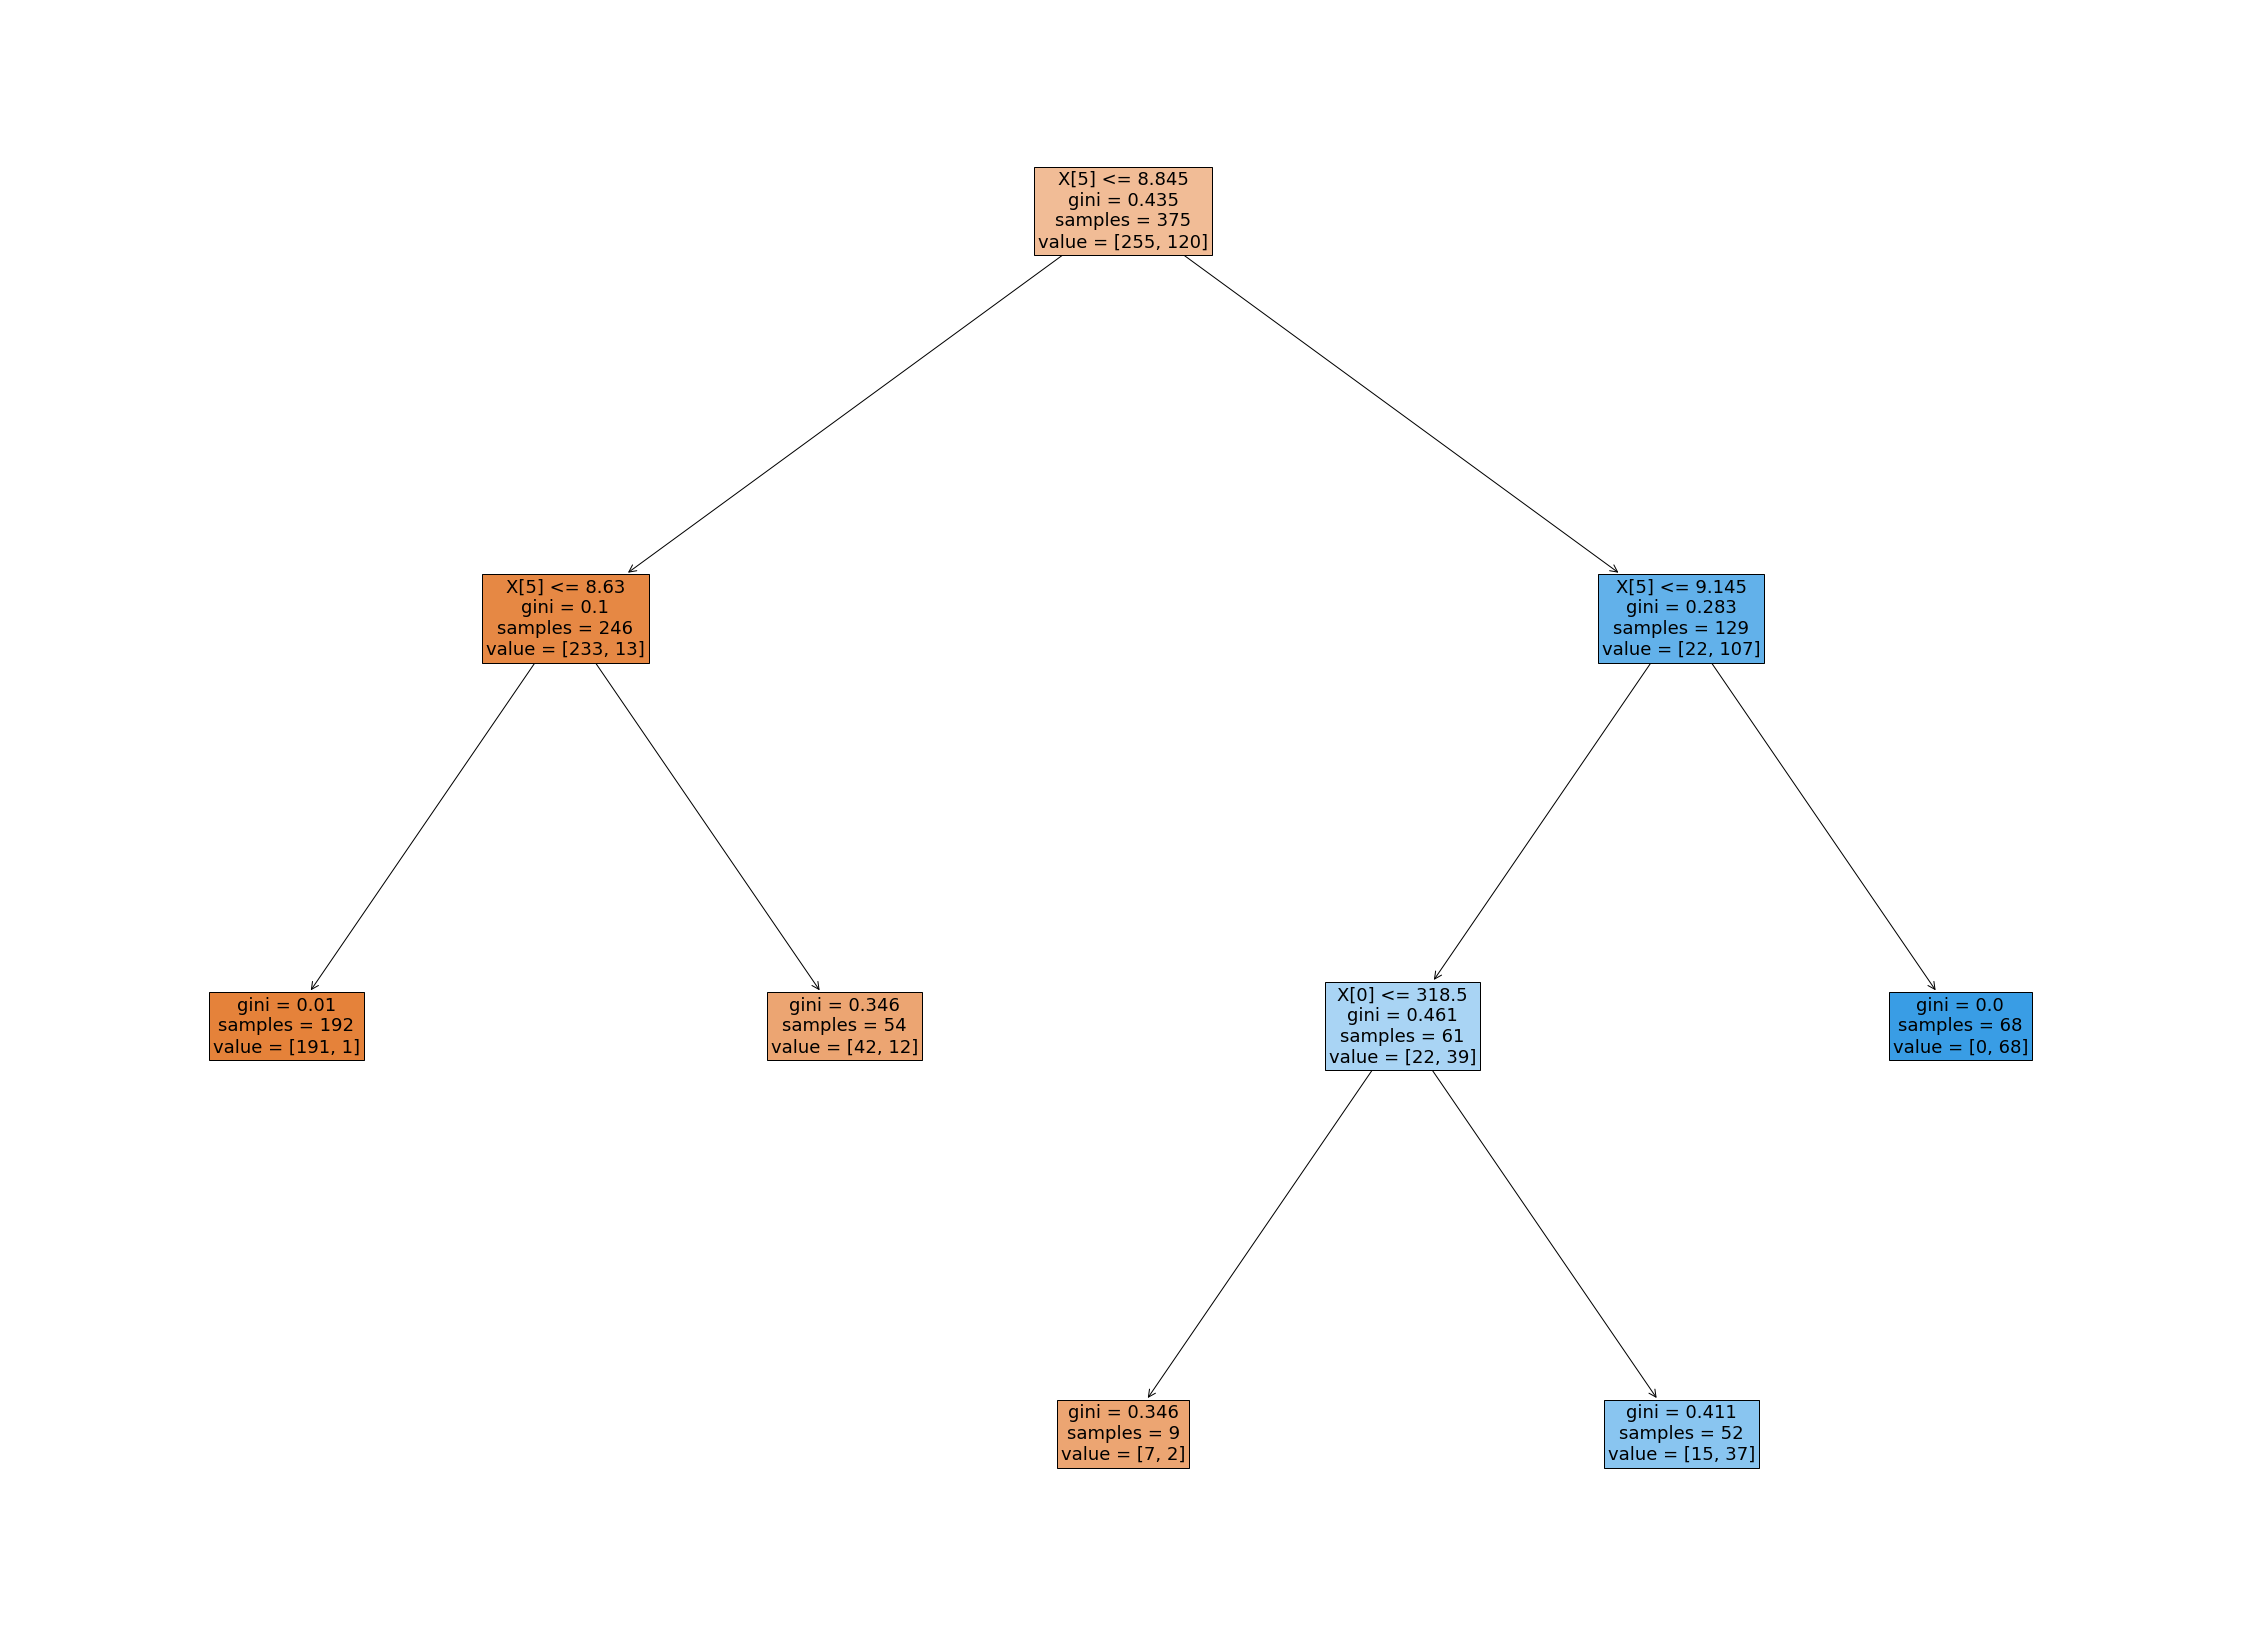

In [90]:
plt.figure(figsize=(40,30))
tree.plot_tree(model, filled=True, fontsize=18)

### Confusion Matrix

In [91]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[87,  3],
       [ 2, 33]])

In [92]:
print('Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('Mean Absolute Error: {:.2f}\n'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}\n'.format(mean_squared_error(y_test, y_pred)))
print('Precision: {:.2f}\n'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}\n'.format(recall_score(y_test, y_pred)))
print('R2 Score: {:.2f}\n'.format(r2_score(y_test, y_pred)))

Accuracy: 0.96

Mean Absolute Error: 0.04

Mean Squared Error: 0.04

Precision: 0.92

Recall: 0.94

R2 Score: 0.80



### HeatMap 

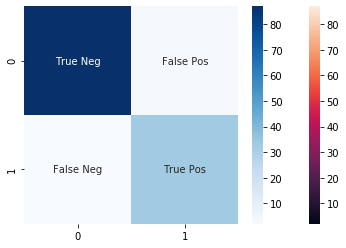

In [93]:
sns.heatmap(mat)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')